In [ ]:
# !pip install seaborn

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks

In [2]:
df = pd.DataFrame(pd.read_csv("04. machine learning/salary_data.csv"))
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
df.shape

(375, 6)

In [4]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [5]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [8]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [9]:
df.shape

(373, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [11]:
# Checking Null values
df.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [12]:
len(set(df['Job Title']))

174

In [ ]:
# df = df.dropna()

In [ ]:
# EDA

In [13]:
auto=df[['Age', 'Gender', 'Education Level', 'Years of Experience','Salary']]

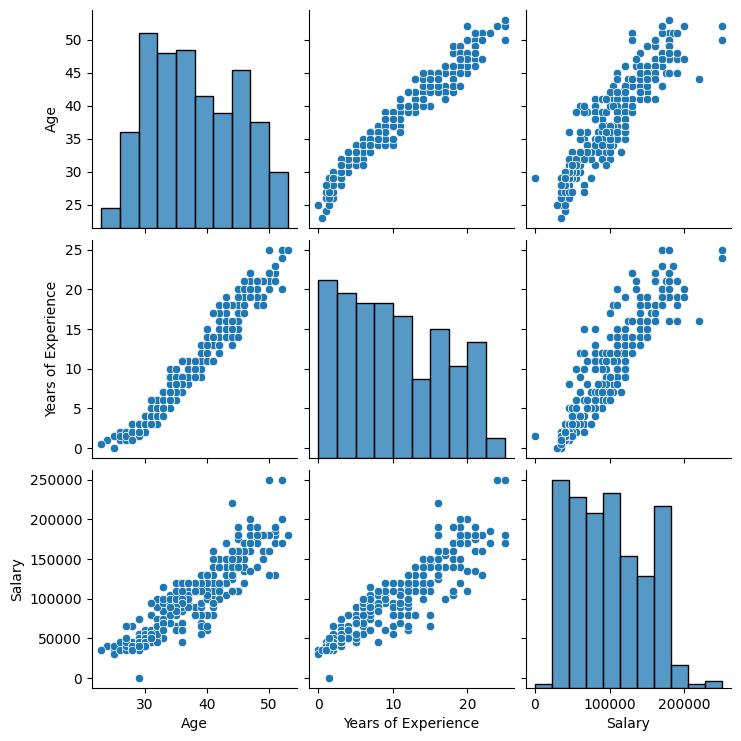

In [14]:
sns.pairplot(auto)

In [20]:
auto.select_dtypes(include=['float64', 'int64']).corr()

,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


<ipython-input-18-d8314c1d3575>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(auto.corr(),annot=True)


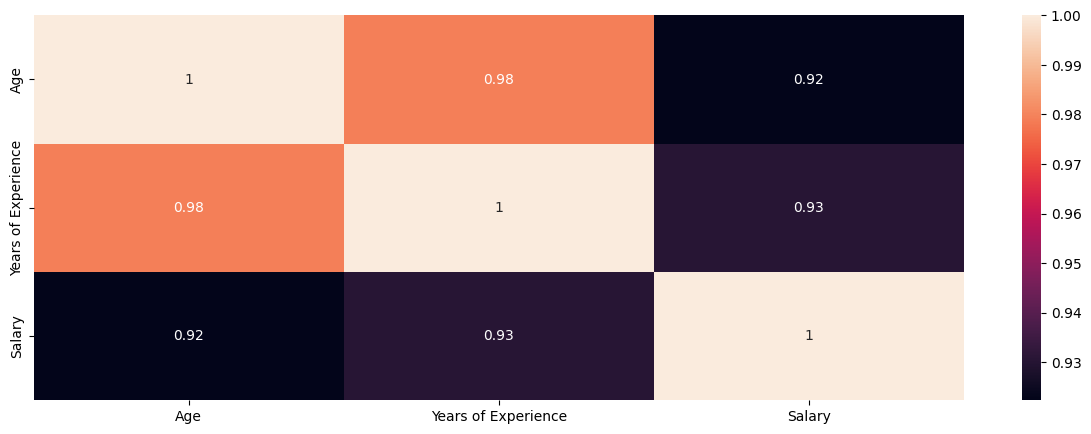

In [ ]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [ ]:
auto

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,Male,Bachelor's,5.0,90000.0
1,28.0,Female,Master's,3.0,65000.0
2,45.0,Male,PhD,15.0,150000.0
3,36.0,Female,Bachelor's,7.0,60000.0
4,52.0,Male,Master's,20.0,200000.0
...,...,...,...,...,...
370,35.0,Female,Bachelor's,8.0,85000.0
371,43.0,Male,Master's,19.0,170000.0
372,29.0,Female,Bachelor's,2.0,40000.0
373,34.0,Male,Bachelor's,7.0,90000.0


In [ ]:
# Dimension reduction

In [ ]:
gender = pd.get_dummies(auto['Gender'], drop_first = True)
gender

,Male
0,1
1,0
2,1
3,0
4,1
...,...
370,0
371,1
372,0
373,1


In [ ]:
auto = pd.concat([auto, gender], axis = 1)
auto

,Age,Gender,Education Level,Years of Experience,Salary,Male
0,32.0,Male,Bachelor's,5.0,90000.0,1
1,28.0,Female,Master's,3.0,65000.0,0
2,45.0,Male,PhD,15.0,150000.0,1
3,36.0,Female,Bachelor's,7.0,60000.0,0
4,52.0,Male,Master's,20.0,200000.0,1
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,8.0,85000.0,0
371,43.0,Male,Master's,19.0,170000.0,1
372,29.0,Female,Bachelor's,2.0,40000.0,0
373,34.0,Male,Bachelor's,7.0,90000.0,1


In [ ]:
education = pd.get_dummies(auto['Education Level'], drop_first = False)
education

,Bachelor's,Master's,PhD
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0
...,...,...,...
370,1,0,0
371,0,1,0
372,1,0,0
373,1,0,0


In [ ]:
auto = pd.concat([auto, education], axis = 1)
auto

,Age,Gender,Education Level,Years of Experience,Salary,Male,Bachelor's,Master's,PhD
0,32.0,Male,Bachelor's,5.0,90000.0,1,1,0,0
1,28.0,Female,Master's,3.0,65000.0,0,0,1,0
2,45.0,Male,PhD,15.0,150000.0,1,0,0,1
3,36.0,Female,Bachelor's,7.0,60000.0,0,1,0,0
4,52.0,Male,Master's,20.0,200000.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,8.0,85000.0,0,1,0,0
371,43.0,Male,Master's,19.0,170000.0,1,0,1,0
372,29.0,Female,Bachelor's,2.0,40000.0,0,1,0,0
373,34.0,Male,Bachelor's,7.0,90000.0,1,1,0,0


In [ ]:
# auto=df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
#        'Salary']]

In [ ]:
auto = auto.drop(['Gender','Education Level'],axis = 1)
auto

,Age,Years of Experience,Salary,Male,Bachelor's,Master's,PhD
0,32.0,5.0,90000.0,1,1,0,0
1,28.0,3.0,65000.0,0,0,1,0
2,45.0,15.0,150000.0,1,0,0,1
3,36.0,7.0,60000.0,0,1,0,0
4,52.0,20.0,200000.0,1,0,1,0
...,...,...,...,...,...,...,...
370,35.0,8.0,85000.0,0,1,0,0
371,43.0,19.0,170000.0,1,0,1,0
372,29.0,2.0,40000.0,0,1,0,0
373,34.0,7.0,90000.0,1,1,0,0


In [ ]:
auto.corr()

,Age,Years of Experience,Salary,Male,Bachelor's,Master's,PhD
Age,1.000000,0.979128,0.922335,-0.020324,-0.541733,0.281897,0.411183
Years of Experience,0.979128,1.000000,0.930338,0.002884,-0.573775,0.306961,0.424752
Salary,0.922335,0.930338,1.000000,0.071106,-0.657181,0.362061,0.473073
Male,-0.020324,0.002884,0.071106,1.000000,0.049259,-0.036219,-0.023827
Bachelor's,-0.541733,-0.573775,-0.657181,0.049259,1.000000,-0.731944,-0.487964
Master's,0.281897,0.306961,0.362061,-0.036219,-0.731944,1.000000,-0.237577
PhD,0.411183,0.424752,0.473073,-0.023827,-0.487964,-0.237577,1.000000


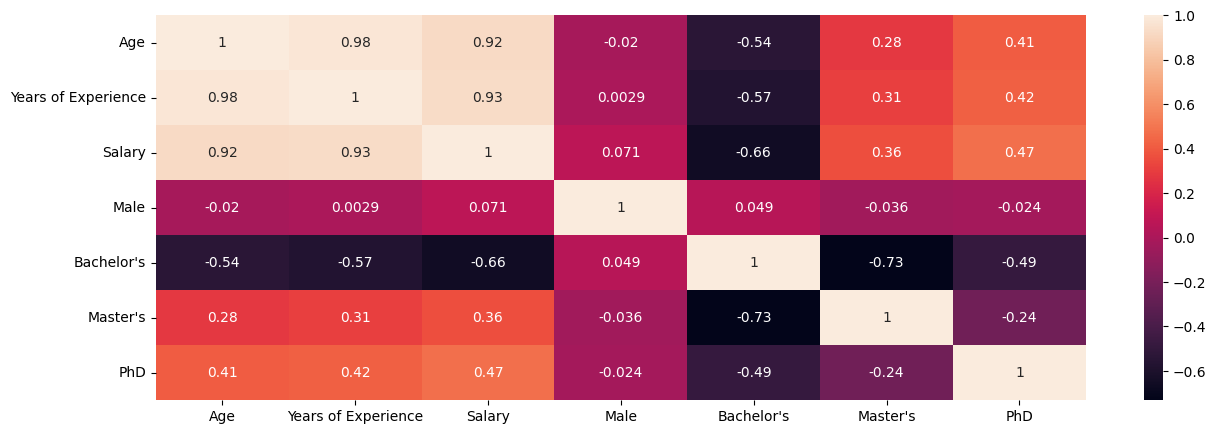

In [ ]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [ ]:
auto = auto.drop(['Male'],axis = 1)
auto

,Age,Years of Experience,Salary,Bachelor's,Master's,PhD
0,32.0,5.0,90000.0,1,0,0
1,28.0,3.0,65000.0,0,1,0
2,45.0,15.0,150000.0,0,0,1
3,36.0,7.0,60000.0,1,0,0
4,52.0,20.0,200000.0,0,1,0
...,...,...,...,...,...,...
370,35.0,8.0,85000.0,1,0,0
371,43.0,19.0,170000.0,0,1,0
372,29.0,2.0,40000.0,1,0,0
373,34.0,7.0,90000.0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(auto, train_size = 0.85, test_size = 0.15, random_state = 1)

In [ ]:
df_train.shape

(317, 6)

In [ ]:
df_test.shape

(56, 6)

In [ ]:
from sklearn.linear_model import LinearRegression
X_train = df_train[['Age','Years of Experience',"Bachelor's",
                    "Master's","PhD"]]

y_train = df_train['Salary']
df_test_predict = X_train.iloc[0:1]
for linear regression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

#for logistic regression
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# model = lr.fit(X_train, y_train)

#for polynomial regression
# from sklearn.preprocessing import PolynomialFeatures
# poly_reg = PolynomialFeatures(degree=7)
# X_poly = poly_reg.fit_transform(X_train)
# # Y_poly = poly_reg.fit_transform(y_train)
# pol_reg = LinearRegression()
# model = pol_reg.fit(X_poly, y_train)
# poly_reg.fit(X_train, y_train)

# model.predict(df_test_predict)

In [ ]:
df_test.iloc[10:11]

,Age,Years of Experience,Salary,Bachelor's,Master's,PhD
314,35.0,8.0,85000.0,1,0,0


In [ ]:
# Testing
data = df_test.iloc[50:51]
actual_salary = data.pop('Salary')

# # print(data)
predicted_salary = pol_reg.predict(poly_reg.fit_transform(data))
print("Actual Salary",actual_salary)
print("predicted Salary",predicted_salary)

# print(df_test.iloc[0:1])
data

Actual Salary 354    50000.0
Name: Salary, dtype: float64
predicted Salary [50758.03466177]


,Age,Years of Experience,Bachelor's,Master's,PhD
354,31.0,3.0,1,0,0


In [ ]:
# data = {'Age':[40],
#         'Years of Experience':[10.5],
#         "Bachelor's":[0],
#         "Master's":[0],
#         # "PhD":[1]}
# df = pd.DataFrame(data)
# predicted_salary = model.predict(df)
# # print("Actual Salary",actual_salary)
# print("predicted Salary",predicted_salary)

In [ ]:
y_train.shape

(317,)

In [ ]:
model.predict(X_train).shape

(317,)

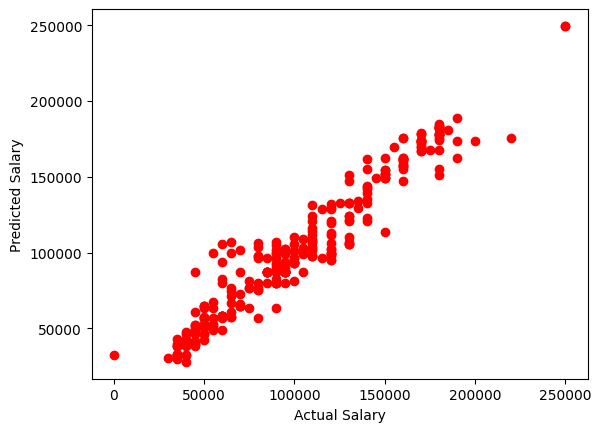

In [ ]:
plt.scatter(y_train,model.predict(poly_reg.fit_transform(X_train)),color = 'red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()